<a href="https://colab.research.google.com/github/Pilo1961/QuestionAnswer_System/blob/master/code/read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de Preguntas y Respuestas

## Explore Data Analysis

### Set up

Para este analisis, empleamos el Dataset SQuAD version 1, mismo que se encuetra disponible en el siguiente [repositorio público](https://github.com/aswalin/SQuAD).

In [0]:
# Libraries required
import numpy as np
import pandas as pd
import json
import pickle

In [3]:
# Load data from Google Drive Account
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Training set

El set de entrenamiento es una archivo *.json* anidado. La estructura del archivo es la siguiente

+ Titulo
+ Paragraph 
    + Context
    + Qas
        + Id
        + Question
        + Answers
            + Text
            + Answer start
  

En las siguientes celdas observamos los diferentes niveles de anidación de los datos.


Los primero que observamos: hay un total de *442* párrafos.

In [4]:
# Lectura de datos
path= "/content/drive/My Drive/QA/train-v1.0.json"
with open(path) as f: 
    d = json.load(f) 
pd.set_option('max_colwidth', 500)
df = pd.json_normalize(d['data'])  
print("Daframe Size:", df.shape)
df.head()

Daframe Size: (442, 2)


,paragraphs,title
0,"[{'context': 'Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the V...",University_of_Notre_Dame
1,"[{'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of ...",Beyoncé
2,"[{'context': 'Montana i/mɒnˈtænə/ is a state in the Western region of the United States. The state's name is derived from the Spanish word montaña (mountain). Montana has several nicknames, although none official, including ""Big Sky Country"" and ""The Treasure State"", and slogans that include ""Land of the Shining Mountains"" and more recently ""The Last Best Place"". Montana is ranked 4th in size, but 44th in population and 48th in population density of the 50 United States. The western third of...",Montana
3,"[{'context': 'The phrase ""in whole or in part"" has been subject to much discussion by scholars of international humanitarian law. The International Criminal Tribunal for the Former Yugoslavia found in Prosecutor v. Radislav Krstic – Trial Chamber I – Judgment – IT-98-33 (2001) ICTY8 (2 August 2001) that Genocide had been committed. In Prosecutor v. Radislav Krstic – Appeals Chamber – Judgment – IT-98-33 (2004) ICTY 7 (19 April 2004) paragraphs 8, 9, 10, and 11 addressed the issue of in part ...",Genocide
4,"[{'context': 'The emergence of resistance of bacteria to antibiotics is a common phenomenon. Emergence of resistance often reflects evolutionary processes that take place during antibiotic therapy. The antibiotic treatment may select for bacterial strains with physiologically or genetically enhanced capacity to survive high doses of antibiotics. Under certain conditions, it may result in preferential growth of resistant bacteria, while growth of susceptible bacteria is inhibited by the drug....",Antibiotics


Existen un total de *18,891* contextos diferentes, como lo veremos a continuación.

Además, si abrimos paragraph, encontramos otras dos columnas:
  + qas - json anidado
  + context - Escrito con el contexto de la pregunta


In [5]:
df=pd.json_normalize(data=d['data'],record_path=['paragraphs'],meta=['title'])
print("Daframe Size:", df.shape)

df.head()

Daframe Size: (18896, 3)


,context,qas,title
0,"Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary rep...","[{'answers': [{'answer_start': 515, 'text': 'Saint Bernadette Soubirous'}], 'id': '5733be284776f41900661182', 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'}, {'answers': [{'answer_start': 187, 'text': ' a copper statue of Christ'}], 'id': '5733be284776f4190066117f', 'question': 'What is in front of the Notre Dame Main Building?'}, {'answers': [{'answer_start': 279, 'text': 'the Main Building'}], 'id': '5733be284776f41900661180', 'question': 'The Basili...",University_of_Notre_Dame
1,"As at most other universities, Notre Dame's students run a number of news media outlets. The nine student-run outlets include three newspapers, both a radio and television station, and several magazines and journals. Begun as a one-page journal in September 1876, the Scholastic magazine is issued twice monthly and claims to be the oldest continuous collegiate publication in the United States. The other magazine, The Juggler, is released twice a year and focuses on student literature and artw...","[{'answers': [{'answer_start': 248, 'text': 'September 1876'}], 'id': '5733bf84d058e614000b61be', 'question': 'When did the Scholastic Magazine of Notre dame begin publishing?'}, {'answers': [{'answer_start': 441, 'text': 'twice'}], 'id': '5733bf84d058e614000b61bf', 'question': 'How often is Notre Dame's the Juggler published?'}, {'answers': [{'answer_start': 598, 'text': 'The Observer'}], 'id': '5733bf84d058e614000b61c0', 'question': 'What is the daily student paper at Notre Dame called?'},...",University_of_Notre_Dame
2,"The university is the major seat of the Congregation of Holy Cross (albeit not its official headquarters, which are in Rome). Its main seminary, Moreau Seminary, is located on the campus across St. Joseph lake from the Main Building. Old College, the oldest building on campus and located near the shore of St. Mary lake, houses undergraduate seminarians. Retired priests and brothers reside in Fatima House (a former retreat center), Holy Cross House, as well as Columba Hall near the Grotto. Th...","[{'answers': [{'answer_start': 119, 'text': 'Rome'}], 'id': '5733bed24776f41900661188', 'question': 'Where is the headquarters of the Congregation of the Holy Cross?'}, {'answers': [{'answer_start': 145, 'text': 'Moreau Seminary'}], 'id': '5733bed24776f41900661189', 'question': 'What is the primary seminary of the Congregation of the Holy Cross?'}, {'answers': [{'answer_start': 234, 'text': 'Old College'}], 'id': '5733bed24776f4190066118a', 'question': 'What is the oldest structure at Notre ...",University_of_Notre_Dame
3,"The College of Engineering was established in 1920, however, early courses in civil and mechanical engineering were a part of the College of Science since the 1870s. Today the college, housed in the Fitzpatrick, Cushing, and Stinson-Remick Halls of Engineering, includes five departments of study – aerospace and mechanical engineering, chemical and biomolecular engineering, civil engineering and geological sciences, computer science and engineering, and electrical engineering – with eight B.S...","[{'answers': [{'answer_start': 487, 'text': 'eight'}], 'id': '5733a6424776f41900660f51', 'question': 'How many BS level degrees are offered in the College of Engineering at Notre Dame?'}, {'answers': [{'answer_start': 46, 'text': '1920'}], 'id': '5733a6424776f41900660f4e', 'question': 'In what year was the College of Engineering at Notre Dame formed?'}, {'answers': [{'answer_sta

In [6]:
df=pd.json_normalize(data=d['data'],record_path=['paragraphs','qas'])#,meta=['title',['paragraph','context']])
print("Daframe Size:", df.shape)
df.head()

Daframe Size: (87636, 3)


,answers,id,question
0,"[{'answer_start': 515, 'text': 'Saint Bernadette Soubirous'}]",5733be284776f41900661182,To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
1,"[{'answer_start': 187, 'text': ' a copper statue of Christ'}]",5733be284776f4190066117f,What is in front of the Notre Dame Main Building?
2,"[{'answer_start': 279, 'text': 'the Main Building'}]",5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame is beside to which structure?
3,"[{'answer_start': 381, 'text': 'a Marian place of prayer and reflection'}]",5733be284776f41900661181,What is the Grotto at Notre Dame?
4,"[{'answer_start': 92, 'text': 'a golden statue of the Virgin Mary'}]",5733be284776f4190066117e,What sits on top of the Main Building at Notre Dame?


Al abrir la columna qas encontramos 3 columnas mas
 + Question
 + Id
 + Answers - que es un json anidado

In [7]:
df=pd.json_normalize(data=d['data'],record_path=['paragraphs','qas','answers'])#,meta=['title',['paragraph','context']])

df.head()

,answer_start,text
0,515,Saint Bernadette Soubirous
1,187,a copper statue of Christ
2,279,the Main Building
3,381,a Marian place of prayer and reflection
4,92,a golden statue of the Virgin Mary


Finalmente, al abrir la columna de answers encontramos las columnas:
+ Answer_start - Información de la posición en la que comienza la respuesta.
+ Text - Respuesta a la pregunta


El dataset final de entrenamiento es:

In [8]:
df=pd.json_normalize(data=d['data'],
                        record_path=['paragraphs','qas','answers'],
                        record_prefix=None,
                        meta_prefix=None,
                        meta=['title',
                              ['paragraph','context'],
                              ['paragraph','qas','question'],
                              ['paragraph','qas','id']])

df.rename(columns={'paragraph.context':'context','paragraph.qas.question':'question','paragraph.qas.id':'id'},inplace=True)
print(df.shape)
df.head()

(87636, 6)


,answer_start,text,title,context,question,id
0,515,Saint Bernadette Soubirous,University_of_Notre_Dame,"Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary rep...",To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?,5733be284776f41900661182
1,187,a copper statue of Christ,University_of_Notre_Dame,"Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary rep...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f
2,279,the Main Building,University_of_Notre_Dame,"Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary rep...",The Basilica of the Sacred heart at Notre Dame is beside to which structure?,5733be284776f41900661180
3,381,a Marian place of prayer and reflection,University_of_Notre_Dame,"Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary rep...",What is the Grotto at Notre Dame?,5733be284776f41900661181
4,92,a golden statue of the Virgin Mary,University_of_Notre_Dame,"Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend ""Venite Ad Me Omnes"". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary rep...",What sits on top of the Main Building at Notre Dame?,5733be284776f4190066117e


Los datos contienen 87636 preguntas para el set de entrenamiento y no contiene valores nulos.



In [9]:
print("dimensiones df",df.shape)
print("Nas \n", df.isna().sum())

dimensiones df (87636, 6)
Nas 
 answer_start    0
text            0
title           0
context         0
question        0
id              0
dtype: int64


In [0]:
# Dump training data in a pickle
with open("/content/drive/My Drive/QA/df_train.pkl", 'wb') as handle:
    pickle.dump(df, handle)

### Validation set

Los datos en el conjunto de validación también se encuentran anidados y organizados en la misma forma que los datos de entrenamiento.

In [10]:
# Lectura de datos
path= "/content/drive/My Drive/QA/dev-v1.0.json"
with open(path) as f: 
    d = json.load(f) 

df2 = pd.json_normalize(d['data'])  
print(df2.shape)
df2.head()

(48, 2)


,paragraphs,title
0,"[{'context': 'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized...",Super_Bowl_50
1,"[{'context': 'One of the most famous people born in Warsaw was Maria Skłodowska-Curie, who achieved international recognition for her research on radioactivity and was the first female recipient of the Nobel Prize. Famous musicians include Władysław Szpilman and Frédéric Chopin. Though Chopin was born in the village of Żelazowa Wola, about 60 km (37 mi) from Warsaw, he moved to the city with his family when he was seven months old. Casimir Pulaski, a Polish general and hero of the American R...",Warsaw
2,"[{'context': 'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse (""Norman"" comes from ""Norseman"") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, thei...",Normans
3,"[{'context': 'Nikola Tesla (Serbian Cyrillic: Никола Тесла; 10 July 1856 – 7 January 1943) was a Serbian American inventor, electrical engineer, mechanical engineer, physicist, and futurist best known for his contributions to the design of the modern alternating current (AC) electricity supply system.', 'qas': [{'answers': [{'answer_start': 54, 'text': '1856'}, {'answer_start': 54, 'text': '1856\xa0'}, {'answer_start': 54, 'text': '1856'}], 'id': '56df9e2838dc4217001520f6', 'question': 'In w...",Nikola_Tesla
4,"[{'context': 'Computational complexity theory is a branch of the theory of computation in theoretical computer science that focuses on classifying computational problems according to their inherent difficulty, and relating those classes to each other. A computational problem is understood to be a task that is in principle amenable to being solved by a computer, which is equivalent to stating that the problem may be solved by mechanical application of mathematical steps, such as an algorithm....",Computational_complexity_theory


In [11]:
df2=pd.json_normalize(data=d['data'],
                        record_path=['paragraphs','qas','answers'],
                        record_prefix=None,
                        meta_prefix=None,
                        meta=['title',
                              ['paragraph','context'],
                              ['paragraph','qas','question'],
                              ['paragraph','qas','id']])

df2.rename(columns={'paragraph.context':'context','paragraph.qas.question':'question','paragraph.qas.id':'id'},inplace=True)
print(df2.shape)
df2.head()

(33615, 6)


,answer_start,text,title,context,question,id
0,176,Denver Broncos,Super_Bowl_50,"Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden a...",Which NFL team represented the AFC at Super Bowl 50?,56be4db0acb8001400a502ec
1,177,Denver Broncos,Super_Bowl_50,"Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden a...",Which NFL team represented the AFC at Super Bowl 50?,56be4db0acb8001400a502ec
2,177,Denver Broncos,Super_Bowl_50,"Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden a...",Which NFL team represented the AFC at Super Bowl 50?,56be4db0acb8001400a502ec
3,248,Carolina Panthers,Super_Bowl_50,"Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden a...",Which NFL team represented the NFC at Super Bowl 50?,56be4db0acb8001400a502ed
4,249,Carolina Panthers,Super_Bowl_50,"Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden a...",Which NFL team represented the NFC at Super Bowl 50?,56be4db0acb8001400a502ed


In [12]:
# Check null values

print("dimensiones df",df2.shape)
print("Nas \n", df2.isna().sum())

dimensiones df (33615, 6)
Nas 
 answer_start    0
text            0
title           0
context         0
question        0
id              0
dtype: int64


In [0]:

# Dump data in a pickle
with open("/content/drive/My Drive/QA/df_test.pkl", 'wb') as handle:
    pickle.dump(df2, handle)

### Análisis de los datos

In [13]:
# Libraries required
from textblob import TextBlob
import matplotlib.pyplot as  plt
import nltk
import seaborn as sns
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


En este apartado emplearemos **Text blob**, una paqueteria en python que nos ayuda a procesar lenguaje natural. Tiene muchas funciones para analizar la sintáxis, tokenizar, hacer preprocesamiento, frecuencias, entre otras.

En el contexto de este análisis, lo utilizamos para extraer las oraciones de los contextos y para contar las palabras y oraciones que tenemos.

In [14]:
# Creamos una lista con todos los contextos
contextos=df["context"].unique()
len(contextos)

18891

In [0]:
# Numero de oraciones por contexto
num_sent=[]
for i in range(len(contextos)):
  num_sent=np.append(num_sent, len(TextBlob(contextos[i]).sentences))

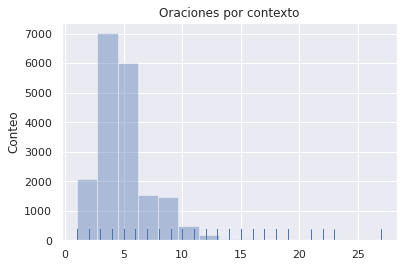

In [27]:

sns.set(style="darkgrid")
g = sns.distplot(num_sent, kde=False, rug =True, color="b", bins=15)
g.set_title("Oraciones por contexto")
g.set_ylabel('Conteo')
plt.show()


In [29]:
print(np.quantile(num_sent,.99))
pd.DataFrame(num_sent).describe()


12.0


,0
count,18891.000000
mean,4.953470
std,2.326159
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,27.000000


Observamos los estadísticos báscios del número de oraciones por contexto. 
La media es de 5 oraciones.
Observamos que el 99% de los contextos tiene 12 o menos oraciones.

In [30]:
#El número total de oraciones que tienen los contextos
sentence_corpus= TextBlob(" ".join(contextos)).sentences
len(sentence_corpus)

92659

También observamos que los contextos de entrenamiento tienen  un corpus de 2220093 palabras.  
Observamos que el promedio de palabras por oración es de 23.9 y que el 99% de las oraciones tienen menos de 63 palabras.

In [31]:
#Numero de palabras en todos los contextos
corpus= TextBlob(" ".join(contextos)).words
len(corpus)

2220093

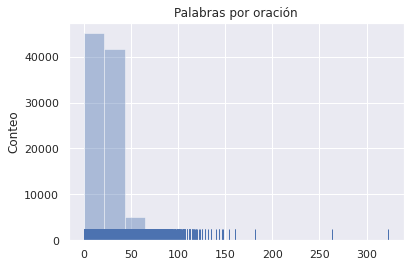

max=  323
min=  0


In [32]:
#palabras por oracion
word_sent=[len(sentence.words) for sentence in sentence_corpus]


sns.set(style="darkgrid")
g = sns.distplot(word_sent, kde=False, rug =True, color="b", bins=15)
g.set_title("Palabras por oración")
g.set_ylabel('Conteo')
plt.show()


print("max= ",max(word_sent))
print("min= ",min(word_sent))

In [33]:
print(np.quantile(word_sent,.99))
pd.DataFrame(word_sent).describe()


63.0


,0
count,92659.000000
mean,23.959820
std,12.137481
min,0.000000
25%,16.000000
50%,22.000000
75%,30.000000
max,323.000000


## Embedding word2Vec



A continuación construimos una representacion matricial de las palabras, dado el contexto en el que aparecen en nuestro corpus.
Para ello, probamos el embedding word2Vec.



In [0]:
import torch
import cython
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [0]:
#Hace el corpus
data=[]
i=0
for cont in contextos: # para cada contexto
  sample=cont
  for sent in sent_tokenize(sample): # Extrae las oraciones
    temp=[]
    for j in word_tokenize(sent): #Extrae las palabras
      temp.append(j.lower())

    data.append(temp)

In [0]:
# La estructura que queda de data tiene la forma de lista de oraciones.
# Cada oracion es una lista de palabras
# Con este metodo tenemos 93576 oraciones, anteriormente teniamos 92659
# Tiene un 0.1% de variacion
print(len(data))
data[1]

93576


['atop',
 'the',
 'main',
 'building',
 "'s",
 'gold',
 'dome',
 'is',
 'a',
 'golden',
 'statue',
 'of',
 'the',
 'virgin',
 'mary',
 '.']

In [0]:
# Entrena un modelo Word2Vec CBOW con nuestro corpus
model1 = gensim.models.Word2Vec(data, min_count = 1,  size = 100, window = 5,workers=8) 

In [0]:
# Longitud del vocabulario
len(model1.wv.vocab)

97680

In [0]:
# La representaciones las podemos ver:
model1['building']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.53325254, -1.1205275 ,  0.447919  , -0.16391894,  1.1319224 ,
       -0.7087768 , -0.03862454, -0.63492316, -0.8012175 ,  0.40396783,
        0.59878665, -0.00822338, -0.43349317,  0.8104244 ,  0.09412549,
        1.3043555 ,  0.852056  ,  0.5326712 ,  0.5236839 ,  0.13958977,
       -0.08586107,  0.3186869 ,  1.1108162 ,  0.62419516,  0.3393669 ,
       -0.9630213 ,  0.60256934, -1.3430564 ,  0.14466654,  0.37595955,
       -0.7461374 , -0.9114267 ,  0.17378269,  1.369758  , -0.10141047,
       -0.15330894, -1.1978418 ,  0.11703686,  0.5602496 , -0.19608802,
       -0.19263071,  0.27364194,  0.6356784 , -0.17845902,  0.64991486,
        0.14662723,  0.41397777, -0.39706194, -0.55872536, -0.73583907,
       -1.2003419 ,  1.558361  ,  0.24621573,  0.06223533,  0.18800636,
       -0.6977862 , -1.2117637 , -0.5185307 , -0.899079  ,  0.76641023,
        0.7879984 , -0.27522948, -0.24981868, -0.85819894, -0.8728474 ,
        0.65737945, -0.01983334, -1.386096  ,  0.00473466,  0.95

In [0]:
# Buscamos palabras similares a otras
# Una pregunta es:
print("La pregunta 1 es: ")
print(df["question"][1])
print("Palabras similares a building: ")
print(model1.wv.most_similar(positive=['building'], topn=5))
print("Palabras similares a notre: ")
print(model1.wv.most_similar(positive=['notre'], topn=5))
print("Palabras similares a dame: ")
print(model1.wv.most_similar(positive=['dame'], topn=5))
print("Palabras similares a front: ")
print(model1.wv.most_similar(positive=['front'], topn=5))

La pregunta 1 es: 
What is in front of the Notre Dame Main Building?
Palabras similares a building: 
[('centre', 0.8550713062286377), ('campus', 0.8209539651870728), ('station', 0.8129981756210327), ('site', 0.8091264963150024), ('shopping', 0.8047854900360107)]
Palabras similares a notre: 
[('dame', 0.9548112154006958), ('yale', 0.8984901309013367), ('dean', 0.8938989639282227), ('harvard', 0.8925623893737793), ('cricket', 0.8903105854988098)]
Palabras similares a dame: 
[('notre', 0.9548113346099854), ('yale', 0.902605414390564), ('princeton', 0.894440233707428), ('fame', 0.8870726823806763), ('cricket', 0.8773947954177856)]
Palabras similares a front: 
[('edge', 0.8561083078384399), ('shores', 0.8450071811676025), ('corner', 0.829058051109314), ('town', 0.8233914375305176), ('isthmus', 0.8201740980148315)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# Entrena un modelo Word2Vec skip-gram con nuestro corpus
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1, workers=8)  

In [0]:
# Buscamos palabras similares a otras
# Una pregunta es:
print("La pregunta 1 es: ")
print(df["question"][1])
print("Palabras similares a building: ")
print(model2.wv.most_similar(positive=['building'], topn=5))
print("Palabras similares a notre: ")
print(model2.wv.most_similar(positive=['notre'], topn=5))
print("Palabras similares a dame: ")
print(model2.wv.most_similar(positive=['dame'], topn=5))
print("Palabras similares a front: ")
print(model2.wv.most_similar(positive=['front'], topn=5))

La pregunta 1 es: 
What is in front of the Notre Dame Main Building?
Palabras similares a building: 
[('construction', 0.8210124969482422), ('constructing', 0.7994292378425598), ('constructed', 0.7942978143692017), ('buildings', 0.7921033501625061), ('housed', 0.7907477617263794)]
Palabras similares a notre: 
[('dame', 0.9722816944122314), ('coach', 0.8675147891044617), ('yankee', 0.8638318777084351), ('cambridge', 0.8634951114654541), ('ivy', 0.8602300882339478)]
Palabras similares a dame: 
[('notre', 0.972281813621521), ('coach', 0.8586839437484741), ('ku', 0.8406217694282532), ('ivy', 0.8369539976119995), ('fame', 0.8352218866348267)]
Palabras similares a front: 
[('wing', 0.8132989406585693), ('38th', 0.8001183271408081), ('beside', 0.7942988276481628), ('battlefield', 0.7939717173576355), ('rear', 0.7908223867416382)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Hay que notar que las probabilidades son diferentes para el modelo de CBOW y de skip-grams aunque se entrenaron con el mismo vocabulario.

In [0]:
i=36
q=word_tokenize(df["question"][i].lower())

print("Pregunta:")
print(q)


print("La respuesta indicada es:")
print(df["text"][i])

print("\n")
print("Palabras mas parecidas con CBOW")
print(model1.wv.most_similar(positive=q, topn=6))

print("\n")
print("Palabras mas parecidas con skip-grams")
print(model2.wv.most_similar(positive=q, topn=6))


Pregunta:
['in', 'what', 'year', 'was', 'the', 'theodore', 'm.', 'hesburgh', 'library', 'at', 'notre', 'dame', 'finished', '?']
La respuesta indicada es:
1963


Palabras mas parecidas con CBOW
[('philharmonic', 0.9165336489677429), ('olympia', 0.9137911200523376), ('sparta', 0.9082456827163696), ('coach', 0.9035303592681885), ('celebration', 0.897372305393219), ('herald', 0.8960696458816528)]


Palabras mas parecidas con skip-grams
[('bennett', 0.9358039498329163), ('honoring', 0.9314770698547363), ('vh1', 0.9259068369865417), ('longest-reigning', 0.9231418371200562), ('22nd', 0.9228159189224243), ('seminar', 0.9227113723754883)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Las predicciones que están dando ambos modelos son muy malas. Las palabras mas parecidas no tienen nada que ver con la respuesta a la pregunta.  
Notese que todavía no tenemos ningún entrenamiento en el modelo. Hasta ahora lo único que tenemos es una representacion matricial de las palabras, dado el contexto en el que aparecen en nuestro corpus.   
Sobre esa información debemos contruir un modelo que ligue nuestras representaciones con el sentido de la pregunta. 


In [0]:
 # Dump model1 in a pickle
 with open("/content/drive/My Drive/QA/word2vec_cbow.pkl", 'wb') as handle:
    pickle.dump(model1, handle)

In [0]:
# Dump model2 in a pickle

with open("/content/drive/My Drive/QA/word2vec_skipgram.pkl", 'wb') as handle:
    pickle.dump(model2, handle)